## Data Science Regression Capstone Project: Bangalore House Price Prediction

Data is downloaded from: https://www.kaggle.com/

In [4]:
pip install --upgrade scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ashwi\anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |           py38_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.5-py38h32f6830~ --> pkgs/main::conda-4.8.5-py38_0




conda-4.8.5          | 2.9 MB    |            |   0% 
conda-4.8.5          | 2.9 MB    |            |   1% 
conda-4.8.5          | 2.9 MB    | 2          |   3% 
conda-4.8.5          | 2.9 MB    | 3          |   3% 
conda-4.8.5          | 2.9 MB    | 3          |   4% 
conda-4.8.5          | 2.9 MB    | 4          |   4% 
conda-4.

In [2]:
# importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('banglore.csv')

In [6]:
df.shape

(13320, 9)

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
# check for null values

df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Data Cleaning

<b>1. Handling NaN values</b>

In [11]:
# Null values handling

df['society'].count() / df.shape[0] * 100

58.693693693693696

In [12]:
# Since 'Society' column contains more 58 percent of null values and also does not seem to be relevant in prediction of price column
# we will drop 'society' column

df.drop(['society'], axis=1, inplace=True)

In [13]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [14]:
# we will use KNN imputer to fill null values and create a new column
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
df['balcony'] = imputer.fit_transform(df[['balcony']])

In [15]:
# Since the number of missing values are very less in remaining columns, we will drop them

df.dropna(inplace=True)

In [16]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

<b> 2. Distplot for features 'bath', 'balcony' and 'price'</b>

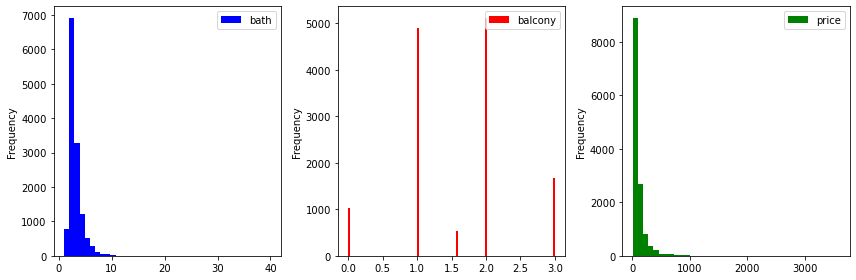

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
df.plot(kind='hist', y='bath', bins=40, color='b', ax=axes[0])
df.plot(kind='hist', y='balcony', bins=100, color='r', ax=axes[1])
df.plot(kind='hist', y='price', bins=40, color='g', ax=axes[2])
plt.tight_layout() 
plt.show()


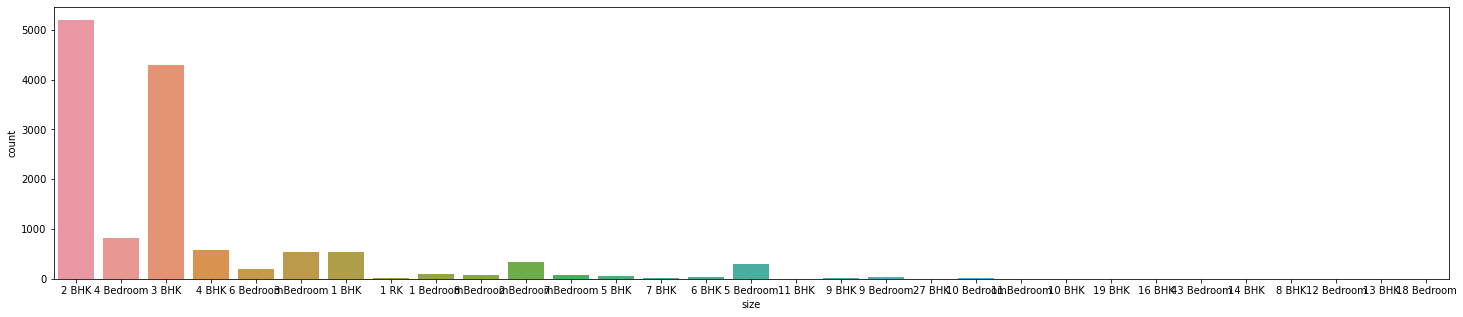

In [18]:
plt.figure(figsize=(25,5))
sns.countplot(df['size'])

## Feature Engineering

<b> 1. Creating a new column for BHK</b>



In [19]:
# check for number of unique values in feature size
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
# assigning new values to column BHK
df['bhk'] = df['size'].astype(str).str.replace('\D+', '')

In [21]:
# converting column from object to int
df['bhk'] = df['bhk'].astype(int)

In [22]:
# drop the old 'size' column
df.drop(['size'], axis=1, inplace=True)

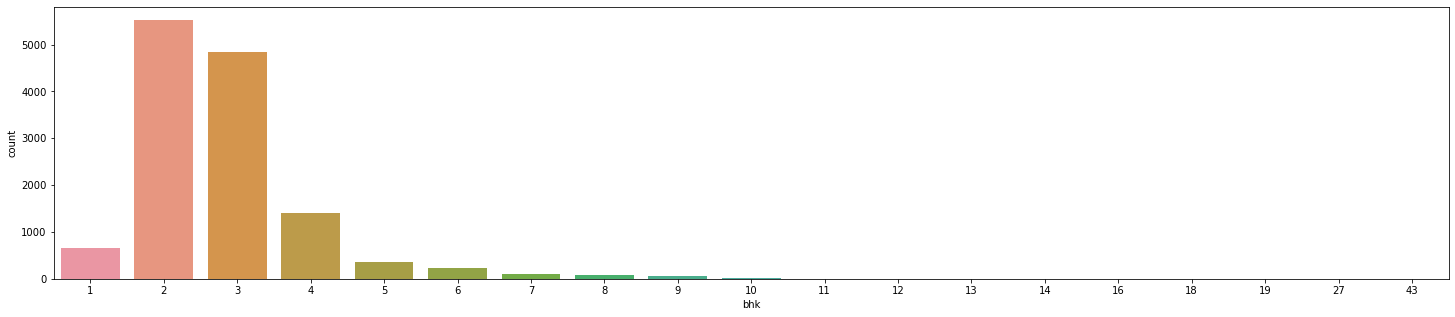

In [23]:
plt.figure(figsize=(25,5))
sns.countplot(df['bhk'])

<b>2. Create a new column for Price per Sq. feet</b>

In [24]:
df['total_sqft'].tolist()

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '1100',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '2100 - 2850',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '600',
 '660',
 '1330.74',
 '600',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '1200',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1100',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '1326',
 '1325',
 '1499',
 '3000',
 '1665',
 '708',
 '1060',
 '710',
 '1000',
 '1000',
 '1450',
 '1200',
 '1296',
 '1540',
 '2894',
 '1330',
 '1200',
 '1200',
 '2502',
 '650',
 '2400',
 '1007',
 '1200',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '1800',
 '1413',
 '1116',
 '1530',
 

In [25]:
# As we can there are some values which in range like '2100 - 2800' and some are in form like '2500 sq. Yards/Meter'
# We will take mean when there is range and for other one we will remove it for simplification
def convert_sqft_to_num(x):
    area = x.split('-')
    if len(area) == 2:
        return (float(area[0])+float(area[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [27]:
df['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [28]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [29]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<b>3. Dimensionality Reduction for 'location' column</b>

In [30]:
df['location'].value_counts()

Whitefield                              534
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          266
Thanisandra                             233
                                       ... 
Shauhardha Layout                         1
Kalasipalya                               1
Muthyala Nagar                            1
Kengeri Satellite Town KHB Apartment      1
Rukmaiah Layout                           1
Name: location, Length: 1304, dtype: int64

In [31]:
location_counts = df['location'].value_counts(ascending=False) 
location_counts

Whitefield                              534
Sarjapur  Road                          392
Electronic City                         302
Kanakpura Road                          266
Thanisandra                             233
                                       ... 
Shauhardha Layout                         1
Kalasipalya                               1
Muthyala Nagar                            1
Kengeri Satellite Town KHB Apartment      1
Rukmaiah Layout                           1
Name: location, Length: 1304, dtype: int64

In [32]:
location_counts.values.sum()

13246

In [33]:
len(location_counts[location_counts>10])

241

In [34]:
# As we can see there 241 locations which have values less than 10 and therefore would not contribute much to our model so we will store them as other

location_counts_less_than_10 = location_counts[location_counts<=10]
location_counts_less_than_10

Sadashiva Nagar                         10
1st Block Koramangala                   10
Ganga Nagar                             10
Naganathapura                           10
Nagadevanahalli                         10
                                        ..
Shauhardha Layout                        1
Kalasipalya                              1
Muthyala Nagar                           1
Kengeri Satellite Town KHB Apartment     1
Rukmaiah Layout                          1
Name: location, Length: 1063, dtype: int64

In [35]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_counts_less_than_10 else x)
len(df['location'].unique())

242

In [36]:
df.head(15)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.000000,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.000000,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.000000,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.000000,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.000000,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,1.000000,38.00,2,3247.863248
6,Super built-up Area,18-May,Old Airport Road,2732.0,4.0,1.584376,204.00,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300.0,4.0,1.584376,600.00,4,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,1310.0,3.0,1.000000,63.25,3,4828.244275
9,Plot Area,Ready To Move,other,1020.0,6.0,1.584376,370.00,6,36274.509804


<b>4. Outlier detection and removal for area and bhk</b>

In [37]:
# Lets check the relation between the area of house and number of bedrooms accordingly

df1 = df[df.total_sqft/df.bhk<300]
df1.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,1020.0,6.0,1.584376,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,1.584376,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407.0,4.0,1.000000,150.0,6,10660.980810
68,Plot Area,Ready To Move,other,1350.0,7.0,0.000000,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,500.0,3.0,2.000000,100.0,3,20000.000000


In [38]:
df1.shape

(744, 9)

In [39]:
# As we can see, 1000 sqft house with 6 bhk certainfly sounds very inappropritae and also other records as well
# Hence we can with any doubt remove them as they could hamper model accuracy

df = df[df.total_sqft/df.bhk>300]
df.shape

(12274, 9)

<b>5. Outlier detection and removal for column bath</b>

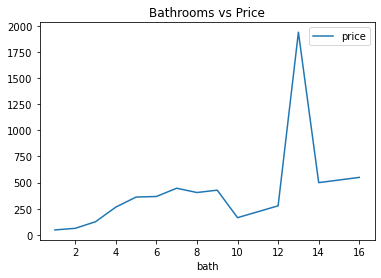

In [40]:
df1 = df.groupby('bath')['price'].mean().reset_index()
df1.plot('bath', 'price', title='Bathrooms vs Price')

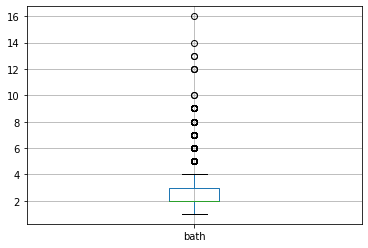

In [41]:
df.boxplot(['bath'])

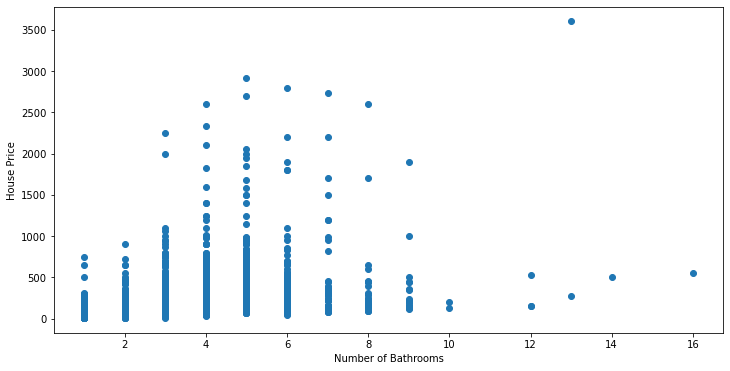

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['bath'], df['price'])
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('House Price')
plt.show()

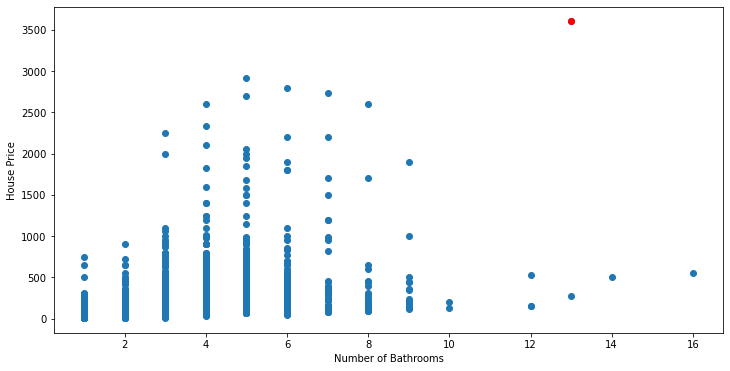

In [43]:
# Highlight the outliers
df1 = df.query('price>3000 or bath>20')
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['bath'], df['price'])
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('House Price')

plt.scatter(x=df1['bath'], y=df1['price'], color='red')
plt.show()

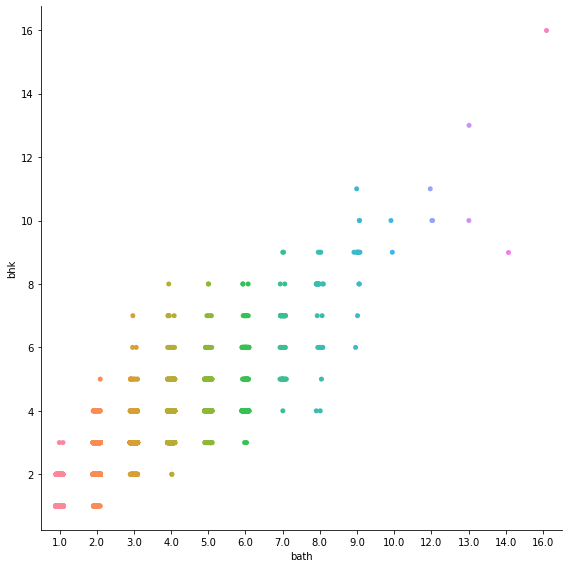

In [44]:
sns.catplot(x='bath', y='bhk', data=df, height=8)

In [45]:
# Now from our domain knowledge we know in general there would be BHK+1 number of bathrooms at any home
# It is very unlikely that bathrooms numbers will exceed BHK + 2 value
# Hence we will all such rows from our dataset as they could be outliers

df = df[df.bath<df.bhk+2]
df.shape

(12127, 9)

<b>6. Outlier detection and removal for feature price per sqft</b>

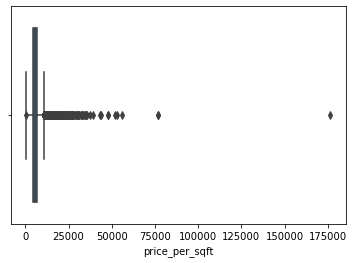

In [46]:
sns.boxplot(df['price_per_sqft'])

In [47]:
df['price_per_sqft'].describe()

count     12127.000000
mean       6150.434976
std        3941.096480
min         267.829813
25%        4194.152471
50%        5241.935484
75%        6775.622160
max      176470.588235
Name: price_per_sqft, dtype: float64

In [48]:
# We can observe here min price/sqft is 267 and max price is 12000000 this shows some variation in prices.
# Hence, we should use mean and std deviation to remove outliers

def outliers_removal(df):
    df_outlier = pd.DataFrame()
    
    for key, subset in df.groupby(['location']):
        m = np.mean(subset['price_per_sqft'])
        st = np.std(subset['price_per_sqft'])
        removed_df = subset[(subset['price_per_sqft']>(m-st)) & (subset['price_per_sqft']<=(m+st))]
        df_outlier = pd.concat([df_outlier,removed_df],ignore_index=True)
    return df_outlier

df = outliers_removal(df)
df.shape

(9901, 9)

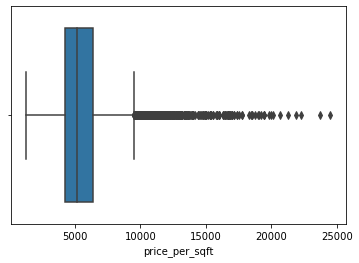

In [49]:
sns.boxplot(df['price_per_sqft'])

### Correlation Check for the features

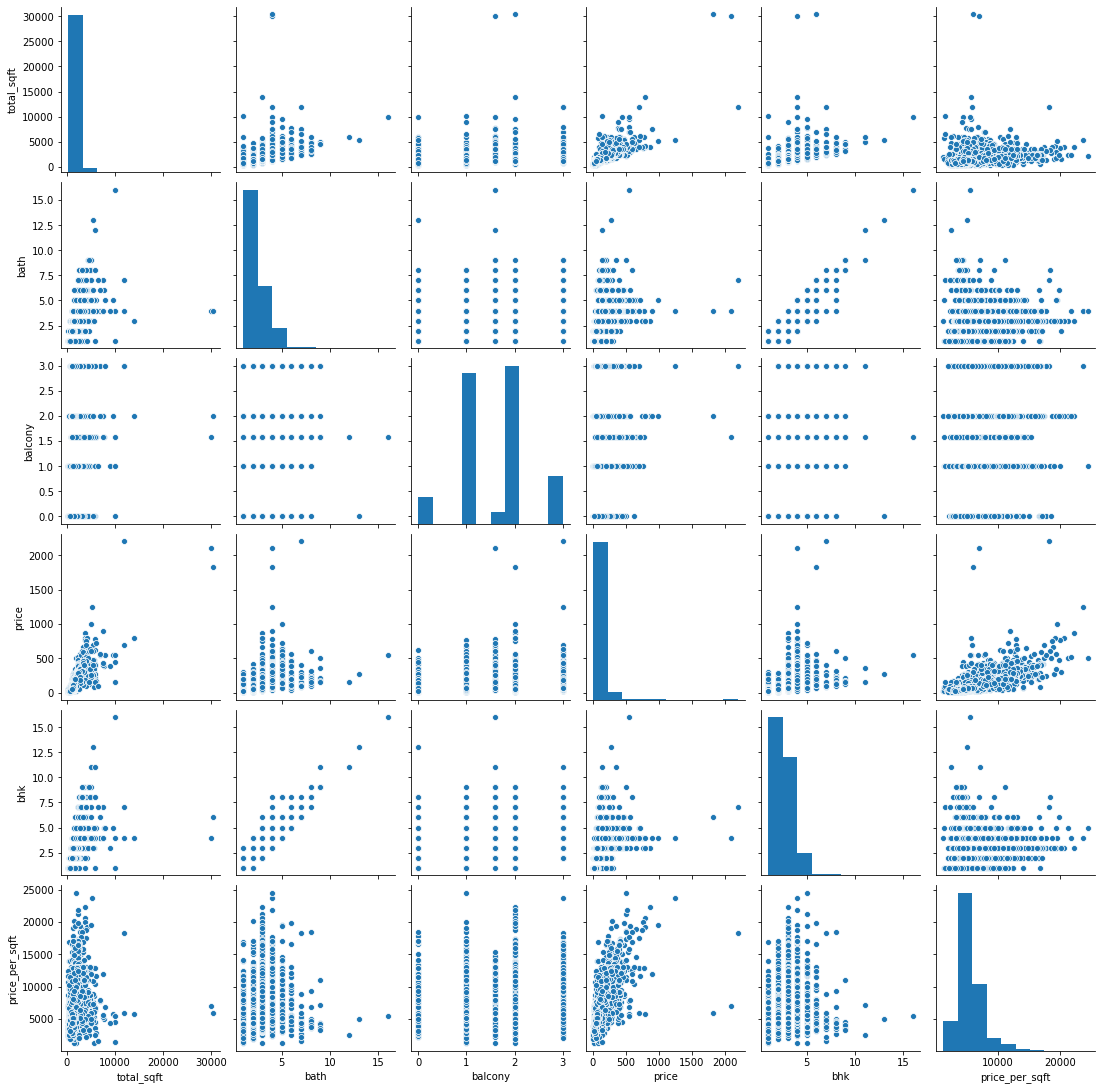

In [50]:
sns.pairplot(df)

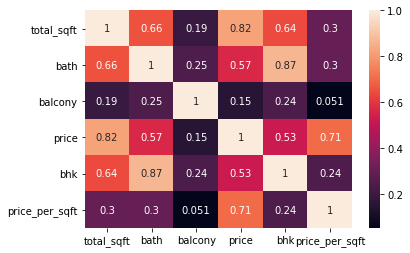

In [51]:
sns.heatmap(df.corr(), annot=True)

### One Hot Encoding for 'location' feature

In [52]:
dummies = pd.get_dummies(df['location'])
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,18-May,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,1,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Ready To Move,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,1,...,0,0,0,0,0,0,0,0,0,0


### Preparing final dataset for the modelling purpose

In [54]:
df.drop(['area_type','availability','location'], axis=1, inplace=True)

In [55]:
df.head()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,44.0,3,3520.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,40.0,2,3200.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,6916.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,3418.803419,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,4561.403509,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# we don't need price per sqft column no more, hence we will drop that as well

df.drop(['price_per_sqft'], axis=1, inplace=True)

In [57]:
df.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,44.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [58]:
X = df.drop(['price'], axis=1)
y = df['price']

In [59]:
X.head()

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y

0        44.00
1        40.00
2        83.00
3        40.00
4        65.00
         ...  
9896    110.00
9897     26.00
9898     63.93
9899     48.00
9900    400.00
Name: price, Length: 9901, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [62]:
print(X_train.shape)
print(X_test.shape)

(7920, 245)
(1981, 245)


### Model Building

we will now build our model using,

1. Linear Regression
2. Random Forest Regressor

And later perform hyperparameter tuning using,

1. k-Fold Cross Validation
2. Grid Search CV

### 1. Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_lr = model.score(X_test,y_test)
y_pred_lr

0.7983723472954243

### 2. Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.score(X_test,y_test)
y_pred_rf

0.7075486626812288

### K-Fold Cross Validation for Linear Regression

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80009756, 0.84082368, 0.86830743, 0.81744447, 0.84483844])

In [66]:
from sklearn.model_selection import GridSearchCV

parameters = {
    
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

grid_cv = GridSearchCV(model, parameters, cv=cv)
grid_cv.fit(X,y)


print("The best score across ALL searched params: ",grid_cv.best_score_)


The best score across ALL searched params:  0.8343023151252382


### Test on New Data

In [67]:
def predict_price(location,sqft,bath,balcony,bhk):    
   

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if 'location_'+location in X.columns:
        loc_index = np.where(X.columns=="location_"+location)[0][0]
        x[loc_index] =1

    return model.predict([x])[0]

In [68]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 2)

56.78389626614806

In [69]:
predict_price('Whitefield',2000, 2, 2, 2)

129.55780305510507

In [70]:
predict_price('Padmanabhanagar',2400, 4, 3, 3)

164.47375503704222

In [71]:
predict_price('Sarjapur  Road',3000, 4, 4, 4)

200.96584784170227

In [72]:
predict_price('Sarjapur  Road',2000, 2, 2, 2)

129.55780305510507

In [73]:
predict_price('Indira Nagar',1000, 3, 2, 3)

56.61700241189308

### Save the model in Pickle format

In [74]:
import pickle
pickle_out = open("price_model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

### Export columns for in Json

In [75]:

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))